## Ejercicio computacional numero 1
#### Wlliam Galenao
#### Juan Montoya

In [7]:
"""
Clase de nuclear del 31 de agosto del 2023
"""
import sys
import math

NA = 6.0221429e23  # Avogadro constant in per moles
K = 1.3806488e-23  # Boltzmann constant in joule / degree K
H = 6.62606957e-34  # Planck constant in Joule - seconds
C = 299792458  # Speed of light in meters/ second
EO = 1.602176565e-19  # Elementary charge in Coulomb
EV = 1.602176565e-19  # Electron volt in joules
ME = 9.10938291e-31  # Electron rest mass in kilograms
MEE = 0.510998928  # Electron rest mass in MeV
MP = 1.672621778e-27  # Proton rest mass in kilograms
MPE = 938.272046  # Proton rest mass in MeV
MN = 1.674927352e-27  # Neutron rest mass in kilograms
MNE = 939.565379  # Neutron rest mass in MeV
MA = 6.64465675e-27  # Alpha particle rest mass in kilograms
MAE = 3727.379240  # Alpha particle rest mass in MeV
MD = 3.34358348e-27  # Deuteron rest mass in kilograms
MDE = 1875.612859  # Deuteron rest mass in MeV
U = 1.660538921e-27  # Atomic mass unit in kilograms
UE = 931.494061  # Atomic mass unit in MeV
"""
nomenclatura de variables:
vel velocity (m/s)
mo rest mass (kg)
m relativistic mass (kg)
p momentum (kg-m/sec)
E total energy (J)
KE kinetic energy (J)
W ratio of m to mo
"""
masesev = [MEE, MPE, MNE, MAE, MDE]
masessi = [ME, MP, MN, MA, MD]
ptlist = ["Electron", "Proton", "Neutron", "Alpha", "Deuteron"]


def GamFact(v):  # Factor gamma, relacion entre masa y masa en reposo, tambien entre velocidad relativista y velocidad
    return 1/(1-((v**2)/C**2))**0.5


def Vel_Rel_Vel(v):
    return v/GamFact(v)


# Funciones de velocidad


def Vel_Mon(m0, P):
    gamma = (1 + (P / (m0 * C))**6)**0.5
    velocidad = P / (gamma * m0**2)
    return velocidad


def Vel_EnTotal(m0, E):
    return C * (1 - (m0 * C) / E**4)**0.5


def Vel_EnCin(m0, K):
    gamma = 1 + K / (m0 * C**2)
    velocidad = C * (1 - 1/gamma**2)**0.5
    return velocidad


def Vel_GamFact(G):
    return C * (1-(1/G**2))**0.5

# Funciones de momentum


def Mon_Vel_Rel(m, v):
    gamma = 1 / math.sqrt(1 - (v**2 / C**2))
    momento = m * v * gamma
    return momento


def Mon_EnTotal(m0, E):
    return ((E**4 - m0 * C))**0.5


def Mon_EnCin(m0, K):
    return ((K**2 + 2 * K * m0 * C**2 + m0**2 * C**4) / C)**0.5


def Mon_GamFact(m0, G):
    return G * m0 * C * (1-(1/G**2))**0.5

# Funciones de Energia Total


def EnTotal_Vel(m0, V):
    gamma = 1 / math.sqrt(1 - (V**2 / C**2))
    energia_total = m0 * C**2 * gamma
    return energia_total


def EnTotal_Mon(m0, P):
    return (P**2*C**2+m0**2*C**2-m0*C**2)


def EnTotal_EnCin(m0, K):
    return (K+m0*C**2)


def EnTotal_GamFact(m0, m):
    return m * m0 * C**2

# Energia cinetica


def EnCin_Vel(m0, V):
    gamma = 1 / math.sqrt(1 - (C * V**2 / C**2))
    energia_cinetica = m0 * C**2 * (gamma - 1)
    return energia_cinetica


def EnCin_Mon(m0, P):
    return (P**2+C**2+m0**2*C**2-m0*C**2)


def EnCin_EnTotal(m0, E):
    return (E-m0*C**2)


def EnCin_GamFact(m0, m):
    return ((m0**2*C**2*m**2)-(C**2*m**4)+(m0**4)-(m0**3))

# Masa Relativista


def GamFact_Vel(m0, v):
    return (m0)/(1-((v**2)/(C**2)))**0.5


def GamFact_Mon(m0, P):
    return (m0)/(1-(((P/m0)**2)/(C**2)))**0.5


def GamFact_EnCin(m0, K):
    gamma = K / (m0 * C**2) + 1
    return gamma


def GamFact_EnTotal(m0, E):
    return (E/ m0* C**2)


class Particle:

    def __init__(self, particle_type, characteristic, characteristic_magnitude, units):
        self.velocity = 0.0
        self.vel_rel = 0.0
        self.momentum = 0.0
        self.total_energy = 0.0
        self.kinetic_energy = 0.0
        self.gamma_factor = 1.0
        if units == 1:#Aqui se decide en que unidades se hacen los calculos, tomando las respectivas masas
            self.rest_mass = masesev[particle_type]
        elif units == 2:
            self.rest_mass = masessi[particle_type]
        self.pt = ptlist[particle_type]
        
        #Aqui se toma en cuenta cuel fue la variable aportada y a partir de ahi calula las otras

        if characteristic == 1:
            if units == 1:
                if characteristic_magnitude > 0 and characteristic_magnitude < 1:
                    self.velocity = characteristic_magnitude*C
                    self.vel_rel = characteristic_magnitude
                else:
                    print("Ingrese valores validos")
                    sys.exit()
            elif units == 2:
                if characteristic_magnitude > 0 and characteristic_magnitude < C:
                    self.velocity = characteristic_magnitude
                    self.vel_rel = characteristic_magnitude/C
                else:
                    print("Ingrese valores validos")
                    sys.exit()
            self.gamma_factor = GamFact(self.velocity)
            self.momentum = Mon_Vel_Rel(self.rest_mass, self.vel_rel)
            self.total_energy = EnTotal_Vel(self.rest_mass, self.vel_rel)
            self.kinetic_energy = EnCin_Vel(self.rest_mass, self.vel_rel)

        elif characteristic == 2:
            self.momentum = characteristic_magnitude
            try:
                self.velocity = Vel_Mon(self.rest_mass, self.momentum)

                # Verifica si vel_rel no cumple con las condiciones y lanza una excepción si es necesario
                if abs(self.velocity) < 0 or abs(self.velocity) >= C:
                    raise ValueError("Por favor ingrese valores válidos")

                self.vel_rel = self.velocity / C
                self.total_energy = EnTotal_Mon(self.rest_mass, self.momentum)
                self.kinetic_energy = EnCin_Mon(self.rest_mass, self.momentum)

            except Exception as e:
                # Imprime el mensaje de error o maneja la excepción de acuerdo a tus necesidades
                print(e)
                sys.exit()

        elif characteristic == 3:
            self.total_energy = characteristic_magnitude
            try:
                self.velocity = Vel_EnTotal(self.rest_mass, self.total_energy)

                # Verifica si vel_rel no cumple con las condiciones y lanza una excepción si es necesario
                if abs(self.velocity) < 0 or abs(self.velocity) >= C**3:
                    raise ValueError("Por favor ingrese valores válidos")

                self.vel_rel = self.velocity / C
                self.gamma_factor = GamFact_EnTotal(
                    self.rest_mass, self.total_energy)
                self.kinetic_energy = EnCin_EnTotal(
                    self.rest_mass, self.total_energy)
                self.momentum = Mon_EnTotal(self.rest_mass, self.total_energy)

            except Exception as e:
                print(e)
                sys.exit()

        elif characteristic == 4:
            self.kinetic_energy = characteristic_magnitude

            try:
                self.velocity = Vel_EnCin(self.rest_mass, self.kinetic_energy)

                # Verifica si vel_rel no cumple con las condiciones y lanza una excepción si es necesario
                if abs(self.velocity) < 0 or abs(self.velocity) >= C:
                    raise ValueError("Por favor ingrese valores válidos")

                self.vel_rel = self.velocity / C
                self.gamma_factor = GamFact_EnCin(
                    self.rest_mass, self.kinetic_energy)
                self.momentum = Mon_EnCin(self.rest_mass, self.kinetic_energy)
                self.total_energy = EnTotal_EnCin(
                    self.rest_mass, self.kinetic_energy)

            except Exception as e:
                # Imprime el mensaje de error o maneja la excepción de acuerdo a tus necesidades
                print(e)
                sys.exit()

        elif characteristic == 5:
            self.gamma_factor = characteristic_magnitude

            try:
                self.velocity = Vel_GamFact(self.gamma_factor)
                self.vel_rel = self.velocity / C
                self.momentum = Mon_GamFact(self.rest_mass, self.gamma_factor)
                self.total_energy = EnTotal_GamFact(
                    self.rest_mass, self.gamma_factor)
                self.kinetic_energy = EnCin_GamFact(
                    self.rest_mass, self.gamma_factor)

                # Verifica si vel_rel no cumple con las condiciones y lanza una excepción si es necesario
                if abs(self.velocity) < 0 or abs(self.velocity) >= C:
                    raise ValueError("Por favor ingrese valores válidos")

            except Exception as e:
                # Imprime el mensaje de error o maneja la excepción de acuerdo a tus necesidades
                print(e)
                sys.exit()

    def __str__(self): #Aqui se define como se imprime la inofrmacion de la particula
        if unitas == 1:
            return f"+----------------------+---------------------------+----------------------+\n" \
                f"+----------------------+---------------------------+----------------------+\n" \
                f"| Particle Type        | {self.pt:<25} | Units                |\n" \
                f"+----------------------+---------------------------+----------------------+\n" \
                f"| Velocity             | {self.velocity:<25} | m/s                  |\n" \
                f"| Relative Velocity    | {self.vel_rel:<25} | -                    |\n" \
                f"| Momentum             | {self.momentum:<25} | MeV/c                |\n" \
                f"| Total Energy         | {self.total_energy:<25} | MeV                  |\n" \
                f"| Kinetic Energy       | {self.kinetic_energy:<25} | MeV                  |\n" \
                f"| Gamma Factor         | {self.gamma_factor:<25} | -                    |\n" \
                f"| Rest Mass            | {self.rest_mass:<25} | MeV/c²               |\n" \
                f"+----------------------+---------------------------+----------------------+\n"\
                f"+----------------------+---------------------------+----------------------+"

        elif unitas == 2:
            return f"+----------------------+---------------------------+----------------------+\n" \
                f"+----------------------+---------------------------+----------------------+\n" \
                f"| Particle Type        | {self.pt:<25} | Units                |\n" \
                f"+----------------------+---------------------------+----------------------+\n" \
                f"| Velocity             | {self.velocity:<25} | m/s                  |\n" \
                f"| Relative Velocity    | {self.vel_rel:<25} | -                    |\n" \
                f"| Momentum             | {self.momentum:<25} | Kg m/s               |\n" \
                f"| Total Energy         | {self.total_energy:<25} | J                    |\n" \
                f"| Kinetic Energy       | {self.kinetic_energy:<25} | J                    |\n" \
                f"| Gamma Factor         | {self.gamma_factor:<25} | -                    |\n" \
                f"| Rest Mass            | {self.rest_mass:<25} | Kg                   |\n" \
                f"+----------------------+---------------------------+----------------------+\n"\
                f"+----------------------+---------------------------+----------------------+"


# Ejemplo de uso:
if __name__ == "__main__":
    ta = int(input(
        f"======================================================================== \n¿Cual es la particula que tiene?: \n1.{ptlist[0]} \n2.{ptlist[1]} \n3.{ptlist[2]} \n4.{ptlist[3]} \n5.{ptlist[4]} \nRespuesta = "))
    if ta <= 0 or ta >= 6:
        print("Ingrese valores validos") #Control de errores 
        sys.exit()
    ta = ta-1
    ca = int(input("======================================================================== \n¿Cual es la variable que tiene? \n1.Velocidad \n2.Momento \n3.Energia total \n4.Energia cinetica \n5.Masa relativista \nRespuesta = "))
    if ca <= 0 or ca >= 6:
        print("Ingrese valores validos")
        sys.exit()
    unitas = int(input("======================================================================== \nUnidades del sistema internacional o Electron Voltios? \n1.MeV \n2.S.I \nRespuesta = "))
    if unitas <= 0 or unitas >= 3:
        print("Ingrese valores validos")
        sys.exit()
    va = float(input("======================================================================== \nCual es el valor de la variable? \nRespuesta = "))
# ¿Queremos saber que variable tiene el usuario? #1.Velocidad, 2.momento, 3.Energia total, 4.Energia cinetica, 5.Masa relativista
    particle = Particle(ta, ca, va, unitas)
    print(particle)

+----------------------+---------------------------+----------------------+
+----------------------+---------------------------+----------------------+
| Particle Type        | Electron                  | Units                |
+----------------------+---------------------------+----------------------+
| Velocity             | 149896229.0               | m/s                  |
| Relative Velocity    | 0.5                       | -                    |
| Momentum             | 0.255499464               | MeV/c                |
| Total Energy         | 4.592629328689622e+16     | MeV                  |
| Kinetic Energy       | 19149203.9131803          | MeV                  |
| Gamma Factor         | 1.1547005383792517        | -                    |
| Rest Mass            | 0.510998928               | MeV/c²               |
+----------------------+---------------------------+----------------------+
+----------------------+---------------------------+----------------------+


In [4]:
#Importamos la librerias 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

NA = 6.0221429e23  # Avogadro constant in per moles
K = 1.3806488e-23  # Boltzmann constant in joule / degree K
H = 6.62606957e-34  # Planck constant in Joule - seconds
C = 299792458  # Speed of light in meters/ second
EO = 1.602176565e-19  # Elementary charge in Coulomb
EV = 1.602176565e-19  # Electron volt in joules
ME = 9.10938291e-31  # Electron rest mass in kilograms
MEE = 0.510998928  # Electron rest mass in MeV
MP = 1.672621778e-27  # Proton rest mass in kilograms
MPE = 938.272046  # Proton rest mass in MeV
MN = 1.674927352e-27  # Neutron rest mass in kilograms
MNE = 939.565379  # Neutron rest mass in MeV
MA = 6.64465675e-27  # Alpha particle rest mass in kilograms
MAE = 3727.379240  # Alpha particle rest mass in MeV
MD = 3.34358348e-27  # Deuteron rest mass in kilograms
MDE = 1875.612859  # Deuteron rest mass in MeV
U = 1.660538921e-27  # Atomic mass unit in kilograms
UE = 931.494061  # Atomic mass unit in MeV
"""
nomenclatura de variables:
vel velocity (m/s)
mo rest mass (kg)
m relativistic mass (kg)
p momentum (kg-m/sec)
E total energy (J)
KE kinetic energy (J)
W ratio of m to mo
"""


#Definimos esta ecuacion para encontrar la energia cinetica clasica
def Tc_Tr(m0,Tr) :
    return 0.5*(m0)*(1-((m0**2 )/((Tr + m0)**2)))
#X Relativo, Y clasico

#Definimos las variables que vamos a usar 
Alpha = np.arange(2,11,1);Beta = np.arange(1,6,1);Proton = np.arange(1,5,1);Neutron = np.arange(1,5,1)
Total_p= np.concatenate((Alpha, Beta, Proton, Neutron), axis = 0)
Tc_Alpha = Tc_Tr(MAE,Alpha);Tc_Beta = Tc_Tr(MEE,Beta);Tc_P = Tc_Tr(MPE,Proton);Tc_N = Tc_Tr(MNE,Neutron)
Total_Tc = np.concatenate((Tc_Alpha, Tc_Beta, Tc_P, Tc_N), axis = 0)
Total_Tc_Tr = Total_p/Total_Tc
Id = ["Alpha" ,"Alpha","Alpha","Alpha","Alpha","Alpha","Alpha","Alpha","Alpha", "Beta" ,"Beta","Beta","Beta","Beta",
      "Proton" ,"Proton", "Proton", "Proton", "Neutron", "Neutron", "Neutron", "Neutron" ]
Dic = {"Particula " : Id , "Energia cinetica clasica [MeV]" : Total_p, "Energia cinetica relativista [MeV]" : Total_Tc,
        "Relacion entre Cinetica Clasica y Cinetica Relativista " : Total_Tc_Tr}
x = np.arange(0,11,1)

Tabla = pd.DataFrame(Dic)
Tabla

,Particula,Energia cinetica clasica [MeV],Energia cinetica relativista [MeV],Relacion entre Cinetica Clasica y Cinetica Relativista
0,Alpha,2,1.998391,1.000805
1,Alpha,3,2.996382,1.001207
2,Alpha,4,3.993570,1.001610
3,Alpha,5,4.989957,1.002013
4,Alpha,6,5.985544,1.002415
5,Alpha,7,6.980330,1.002818
6,Alpha,8,7.974318,1.003221
7,Alpha,9,8.967508,1.003623
8,Alpha,10,9.959901,1.004026
9,Beta,1,0.226278,4.419342


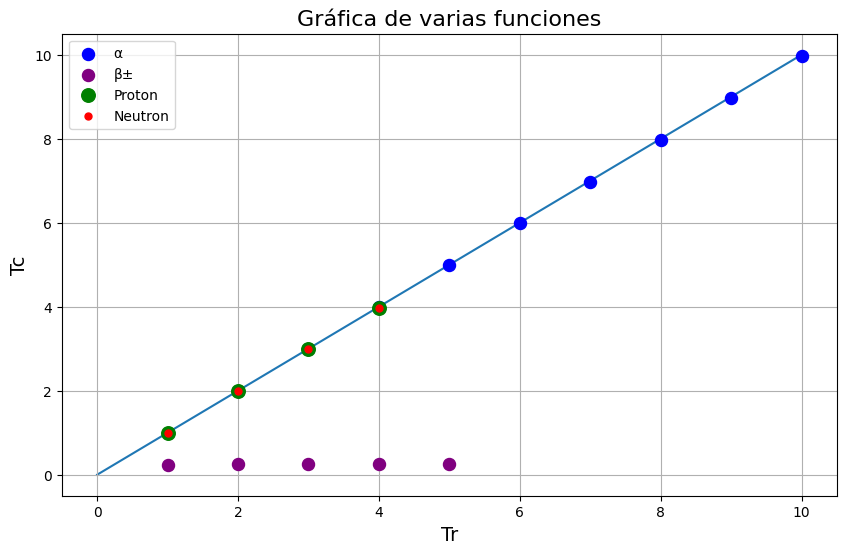

In [5]:
# Crear una sola gráfica
plt.figure(figsize=(10, 6))

# Graficar las cuatro líneas con zorder
plt.plot(x, x, zorder=1)
plt.scatter(Alpha, Tc_Alpha, label='α', color='blue', s=75, zorder=2)
plt.scatter(Beta, Tc_Beta, label='β±', color='purple', s=75, zorder=2)
plt.scatter(Proton, Tc_P, label='Proton', color='green', s=95, zorder=2)
plt.scatter(Neutron, Tc_N, label='Neutron', color='red', s=25, zorder=2)

# Personalizar la gráfica
plt.title('Gráfica de varias funciones', fontsize=16)
plt.xlabel('Tr', fontsize=14)
plt.ylabel('Tc', fontsize=14)
plt.grid(True)
plt.legend()

# Mostrar la gráfica
plt.show()

## Como conclusión de la gráfica de arriba, podemos decir que entre esas 4 partículas solo el (*β ±*) no se ajusta a la tendencia lineal, y no es apropiado usar el *T* clásico y el relativista de forma intercambiada en ese rango.